#Analisi dei disastri aerei dal 1919 al 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'
dataset = pd.read_csv(url)
dataset.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
dataset.dtypes

,0
date,object
type,object
registration,object
operator,object
fatalities,object
location,object
country,object
cat,object
year,object


In [ ]:
dataset.shape

(23967, 9)

###In quale nazione si sono verificati più incidenti?

In [ ]:
dataset['country'].nunique()

232

In [ ]:
incidenti_totali = dataset['country'].value_counts().head(10).reset_index()
incidenti_totali.columns = ['paesi','incidenti']
incidenti_totali['percentuale'] = (incidenti_totali['incidenti']/dataset.shape[0])*100
print(incidenti_totali)

             paesi  incidenti  percentuale
0              USA       4377    18.262611
1           Russia       1422     5.933158
2  Unknown country        838     3.496474
3             U.K.        837     3.492302
4           Canada        826     3.446405
5            India        700     2.920683
6           Brazil        609     2.540994
7           France        550     2.294822
8          Germany        516     2.152960
9            China        514     2.144616


In [ ]:
incidenti_totali_abbr = incidenti_totali.copy()
incidenti_totali_abbr['paesi_abbr'] = incidenti_totali['paesi'].str[:3].str.upper()

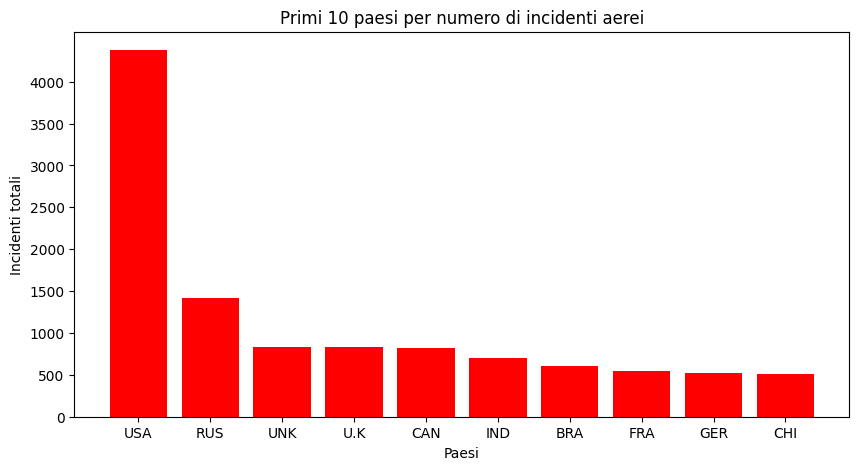

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(incidenti_totali_abbr['paesi_abbr'], incidenti_totali['incidenti'], color='red')
plt.xlabel("Paesi")
plt.ylabel("Incidenti totali")
plt.title("Primi 10 paesi per numero di incidenti aerei")
plt.yticks(np.arange(0, 4500, 500))
plt.show()

Gli Stati Uniti detengono il primato di nazione dove si sono verificati più incidenti, con un totale di 4377.

###Gli incidenti avvengono più di frequente durante determinati giorni della settimana?

In [ ]:
print(dataset['date'])

0          date unk.
1          date unk.
2          date unk.
3          date unk.
4          date unk.
            ...     
23962    11-MAY-2023
23963    11-MAY-2023
23964    12-MAY-2023
23965    14-MAY-2023
23966    15-MAY-2023
Name: date, Length: 23967, dtype: object


In [ ]:
dataset['date'].isna().sum()

np.int64(0)

In [ ]:
(dataset['date'] == "date unk.").sum()

np.int64(61)

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')
print(dataset['date'])

/tmp/ipython-input-13-2352690661.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')


0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
23962   2023-05-11
23963   2023-05-11
23964   2023-05-12
23965   2023-05-14
23966   2023-05-15
Name: date, Length: 23967, dtype: datetime64[ns]


In [ ]:
print(dataset['date'].dtypes)

datetime64[ns]


In [ ]:
dataset['giorni_settimana'] = dataset['date'].dt.day_name()
print(dataset['giorni_settimana'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
23962    Thursday
23963    Thursday
23964      Friday
23965      Sunday
23966      Monday
Name: giorni_settimana, Length: 23967, dtype: object


In [ ]:
incidenti_giorni = dataset['giorni_settimana'].value_counts()
print(incidenti_giorni)

giorni_settimana
Friday       3701
Thursday     3516
Wednesday    3491
Tuesday      3444
Monday       3317
Saturday     3186
Sunday       2753
Name: count, dtype: int64


In [ ]:
ordine_giorni = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
incidenti_giorni = incidenti_giorni.reindex(ordine_giorni)
print(incidenti_giorni)

giorni_settimana
Monday       3317
Tuesday      3444
Wednesday    3491
Thursday     3516
Friday       3701
Saturday     3186
Sunday       2753
Name: count, dtype: int64


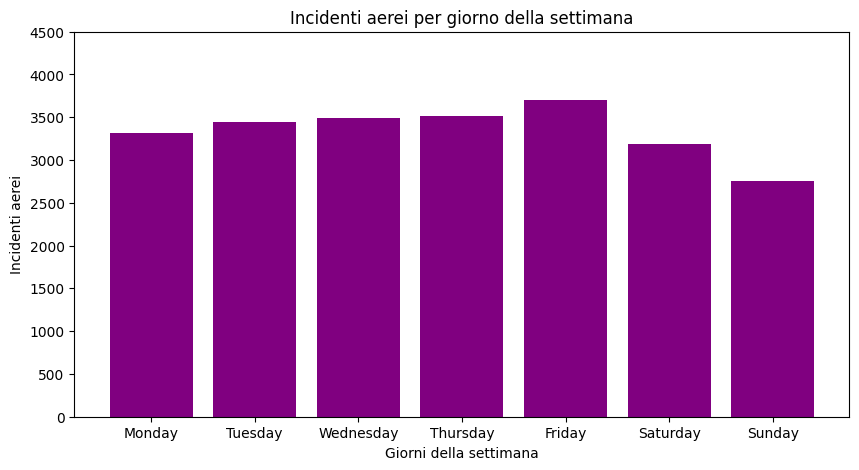

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(incidenti_giorni.index, incidenti_giorni.values, color='purple')
plt.xlabel("Giorni della settimana")
plt.ylabel("Incidenti aerei")
plt.title("Incidenti aerei per giorno della settimana")
plt.yticks(np.arange(0,5000,500))
plt.show()

Gli incidenti sono uniformemente distribuiti nell'arco della settimana con una leggera superiorità nel venerdì, per poi diminuire durante sabato e domenica.

###Quali sono gli operatori più sicuri?

In [ ]:
dataset['operator'].nunique()

6017

In [ ]:
dataset['operator'].isna().sum()

np.int64(4)

In [ ]:
operatori_1_incidente = dataset['operator'].value_counts()
operatori_1_incidente = operatori_1_incidente[operatori_1_incidente == 1].index
print(operatori_1_incidente)

Index(['Belavia', 'Naturelink Airlines', 'EAS Airlines',
       'Interstate Helicopters', 'Tadair', 'SASCA Airlines',
       'US Airways Express, opb Republic Airlines', 'Volga-Aviaexpress',
       'Krasnoyarski ASK', 'American Virginia',
       ...
       'Viking Air Transport', 'Rhoades Int.', 'Bruno's',
       'Business Express, op.for Delta Connection', 'Norfolk Island Airlines',
       'ANA, opf USAAF', 'Aerovias Brasil, lsf TACA', 'Air Carrier Transport',
       'BOAC, op.for Qantas', 'Aliserio'],
      dtype='object', name='operator', length=4063)


In [ ]:
operatori_1_incidente.nunique()

4063

In [ ]:
dataset['fatalities'] = pd.to_numeric(dataset['fatalities'], errors='coerce')

In [ ]:
operatori_sicuri = dataset[(dataset['operator'].isin(operatori_1_incidente)) & (dataset['fatalities']==0)]['operator'].unique()
print(len(operatori_sicuri))

2416


In [ ]:
print(operatori_sicuri)

['MD Air Services' 'JetPet' 'HP Indo-Burmese Transport' ...
 'Angkasa Super Services' 'Nasional Global Aviasi' 'Bar Aviation']


In totale ci sono 6017 operatori, di cui 4063 che hanno causato solo un incidente. Di questi 4063, 2416 non hanno causato decessi. Tra questi operatori più sicuri ci sono ad esempio "MD Air Services", "JetPet", "HP Indo-Burmese Transport", "Angkasa Super Services", "Nasional Global Aviasi", "Bar Aviation"...

###Quale tipo di velivolo ha causato più morti?

In [ ]:
dataset['type'].nunique()

3201

In [ ]:
dataset['type'].isna().sum()

np.int64(0)

In [ ]:
velivolo_mortale = dataset.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(1)
print(velivolo_mortale)

type
Douglas C-47A (DC-3)    5689.0
Name: fatalities, dtype: float64


Il velivolo Douglas C-47A (DC-3) con 5689 decessi è il velivolo più mortale.

###Dove avvengono principalmente gli incidenti?

In [ ]:
dataset['location'].nunique()

14608

In [ ]:
location_incidenti = dataset['location'].value_counts()
location_incidenti.head(20)

,count
location,
unknown,272
Havana-JosÃ© Mar...,106
Miami Internatio...,71
Beirut Internati...,48
New York-John F....,44
Amsterdam-Schiph...,44
Unknown,44
Chicago-O'Hare I...,40
BogotÃ¡-Eldorado...,31


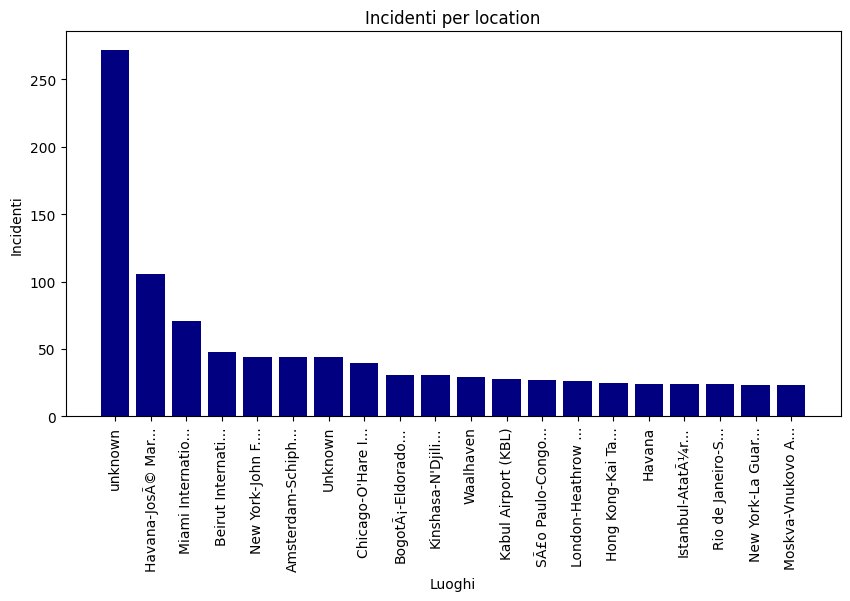

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(location_incidenti.index[:20], location_incidenti.values[:20], color='navy')
plt.xlabel("Luoghi")
plt.ylabel("Incidenti")
plt.title("Incidenti per location")
plt.xticks(rotation=90)
plt.show()

La maggior parte degli incidenti sono avvenuti nei pressi degli aeroporti. Tuttavia, è presente un'ampia percentuale con location sconosciuta.

###Come si sono evoluti gli incidenti dopo l'11 settembre?

In [ ]:
dataset['anno'] = dataset['date'].dt.year

In [ ]:
incidenti_prima_11_settembre = dataset[dataset['date'] < '2001-09-11']
incidenti_dopo_11_settembre = dataset[dataset['date'] >= '2001-09-11']
print(incidenti_prima_11_settembre.shape[0])
print(incidenti_dopo_11_settembre.shape[0])

18898
4510


In [ ]:
incidenti_prima = incidenti_prima_11_settembre.groupby('anno').size()
incidenti_dopo = incidenti_dopo_11_settembre.groupby('anno').size()

In [ ]:
morti_prima_11_settembre = incidenti_prima_11_settembre['fatalities'].sum()
morti_dopo_11_settembre = incidenti_dopo_11_settembre['fatalities'].sum()
print(morti_prima_11_settembre)
print(morti_dopo_11_settembre)

105380.0
15309.0


In [ ]:
morti_prima = incidenti_prima_11_settembre.groupby('anno')['fatalities'].sum()
morti_dopo = incidenti_dopo_11_settembre.groupby('anno')['fatalities'].sum()

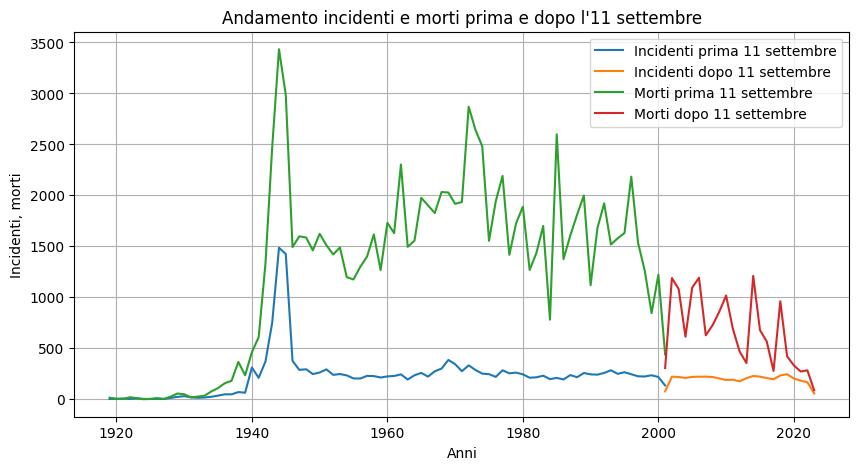

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(incidenti_prima.index, incidenti_prima.values, label="Incidenti prima 11 settembre")
plt.plot(incidenti_dopo.index, incidenti_dopo.values, label="Incidenti dopo 11 settembre")
plt.plot(morti_prima.index, morti_prima.values, label="Morti prima 11 settembre")
plt.plot(morti_dopo.index, morti_dopo.values, label="Morti dopo 11 settembre")
plt.xlabel("Anni")
plt.ylabel("Incidenti, morti")
plt.title("Andamento incidenti e morti prima e dopo l'11 settembre")
plt.legend()
plt.grid(True)
plt.show()

Prendendo in considerazione i ventenni prima e dopo l'11 settembre 2001 si può vedere una differenza più netta.

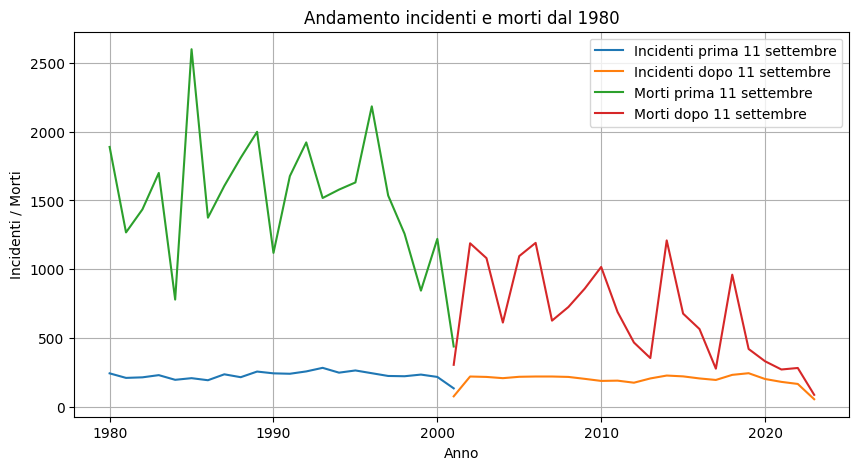

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(incidenti_prima[incidenti_prima.index >= 1980], label="Incidenti prima 11 settembre")
plt.plot(incidenti_dopo[incidenti_dopo.index >= 1980], label="Incidenti dopo 11 settembre")
plt.plot(morti_prima[morti_prima.index >= 1980], label="Morti prima 11 settembre")
plt.plot(morti_dopo[morti_dopo.index >= 1980], label="Morti dopo 11 settembre")
plt.xlabel("Anno")
plt.ylabel("Incidenti / Morti")
plt.title("Andamento incidenti e morti dal 1980")
plt.legend()
plt.grid(True)
plt.show()

L'attentato dell'11 settembre si è tradotto in un aumento delle misure di sicurezza durante i voli poiché come si può notare nel grafico il primo ventennio del 2000 si è caratterizzato da alti e bassi che hanno portato ad una graduale riduzione del numero di decessi. Anche il numero di incidenti si è ridotto lentamente soprattutto a partire dal 2020.

###Rapporto tra paesi e incidenti annuali

In [ ]:
incidenti_per_anno = dataset['year'].value_counts().reset_index()
incidenti_per_anno.columns = ['Anno', 'Incidenti']
print(incidenti_per_anno.head(30))

    Anno  Incidenti
0   1944       1505
1   1945       1445
2   1943        769
3   1969        393
4   1942        389
5   1946        379
6   1970        351
7   1972        339
8   1940        318
9   1968        307
10  1948        300
11  1951        295
12  1973        293
13  1947        292
14  1977        291
15  1993        288
16  1971        284
17  1967        280
18  1989        268
19  1995        267
20  1979        267
21  1975        266
22  1992        264
23  1965        262
24  1950        262
25  1978        259
26  1994        258
27  1974        254
28  1980        254
29  1996        253


In [ ]:
incidenti_anno_paese = dataset.groupby(['country', 'year']).size().reset_index()
incidenti_anno_paese.columns = ['Paese', 'Anno', 'Incidenti']
primi_20 = incidenti_anno_paese.sort_values(by='Incidenti', ascending=False).head(30)
print(primi_20)

                Paese  Anno  Incidenti
6009  Unknown country  1945        276
5842              USA  1944        180
3810      Netherlands  1940        178
5841              USA  1943        171
1122            China  1945        163
3707          Myanmar  1945        149
2493            India  1944        144
5843              USA  1945        125
5723             U.K.  1944        123
6008  Unknown country  1944        123
1121            China  1944        109
2494            India  1945        109
2047          Germany  1945        104
3706          Myanmar  1944        100
1892           France  1944         91
3812      Netherlands  1944         90
5840              USA  1942         76
4388      Philippines  1945         73
6007  Unknown country  1943         70
5917              USA  2019         69
5844              USA  1946         69
5845              USA  1947         68
5849              USA  1951         67
5876              USA  1978         62
4084      P.N. Guinea  19

La maggior parte degli incidenti si sono verificati negli anni '40; 1944 e 1945 insieme raggruppano quasi 3000 incidenti.
Gli Stati Uniti sono il paese dove sono avvenuti più incidenti nel corso di quegli anni e ancora oggi detengono questo primato (es. 2019, 2020, 2021). Purtroppo per numerosi incidenti avvenuti nei primi anni '40 la localizzazione è sconosciuta.

###Incidenti per nazione

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
incidenti_per_nazione = dataset['country'].value_counts().reset_index()
incidenti_per_nazione.columns = ['Paese', 'Incidenti']
incidenti_per_nazione

,Paese,Incidenti
0,USA,4377
1,Russia,1422
2,Unknown country,838
3,U.K.,837
4,Canada,826
...,...,...
227,Cook Isl.,1
228,Kosovo,1
229,Burundi,1
230,Eswatini,1


In [ ]:
from zipfile import ZipFile
from google.colab import files
uploaded = files.upload()

Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.README.html to ne_110m_admin_0_countries.README.html
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.VERSION.txt to ne_110m_admin_0_countries.VERSION.txt


In [ ]:
world_map = gpd.read_file("ne_110m_admin_0_countries.shp")
world_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [ ]:
paesi_mappa = set(world_map['ADMIN'])
paesi_incidenti = set(incidenti_per_nazione['Paese'])

differenza_mappa = paesi_incidenti - paesi_mappa
print(differenza_mappa)

{'Pacific Ocean', 'Atlantic Ocean', 'U.A.E.', 'St. Vincent', 'Cook Isl.', 'Saint Lucia', 'St. Kitts & Nevis', 'Hong Kong', 'Singapore', 'Trinidad & Tobago', 'Bosnia', 'Gibraltar', 'Maldives', 'P.N. Guinea', 'Saint BarthÃ©lemy', "Caribbean Neth'lands", 'Mauritius', "Cote d'Ivoire", 'USA', 'Unknown country', 'Bahrain', 'Falkland Isl.', 'B.V.I.', 'Reunion', 'Eswatini', 'Guam', 'Eq. Guinea', 'St.Pierre & Miquelon', 'Seychelles', 'Congo', 'Tuvalu', 'Malta', 'D.R. Congo', 'Monaco', 'Timor', 'Solomon Isl.', 'U.S. M.O. Islands', 'Martinique', 'French Polynesia', 'Anguilla', 'Dominica', 'Sint Maarten', 'Aruba', 'Macau', 'Marshall Isl.', 'U.K.', 'Serbia', 'Cocos Isl.', 'Kiribati', 'Montserrat', 'Cape Verde', 'Arctic Ocean', 'CuraÃ§ao', 'Cayman Isl.', 'Guadeloupe', 'Norfolk Island', 'U.S. Virgin Isl.', 'St. Helena', 'Czech Rep.', 'Antigua', '?', 'Indian Ocean', 'Northern Mariana Isl', 'Dominican Rep.', 'Barbados', 'Christmas Isl.', 'Comoros', 'Turks & Caicos', 'Tanzania', 'French Guiana', 'Medite

In [ ]:
differenza_incidenti = paesi_mappa - paesi_incidenti
print(differenza_incidenti)

{'The Bahamas', 'French Southern and Antarctic Lands', 'Republic of Serbia', 'Falkland Islands', 'Czechia', 'United Republic of Tanzania', 'Dominican Republic', 'Palestine', 'United Arab Emirates', 'East Timor', 'Equatorial Guinea', 'Democratic Republic of the Congo', 'Solomon Islands', 'Papua New Guinea', 'Republic of the Congo', 'Central African Republic', 'Somaliland', 'Trinidad and Tobago', 'eSwatini', 'United Kingdom', 'Ivory Coast', 'United States of America', 'Brunei', 'Northern Cyprus', 'Bosnia and Herzegovina'}


In [ ]:
rename_countries = {
    'P.N. Guinea' : 'Papua New Guinea',
    'Eq. Guinea' : 'Equatorial Guinea',
    'D.R. Congo' : 'Democratic Republic of the Congo',
    'Solomon Isl.' : 'Solomon Islands',
    'U.S. M.O. Islands' : 'United States of America',
    'Congo' : 'Republic of the Congo',
    'Eswatini' : 'eSwatini',
    'Bosnia' : 'Bosnia and Herzegovina',
    "Cote d'Ivoire" : "Ivory Coast",
    'U.S. Virgi Isl.' : 'United States of America',
    'USA' : 'United States of America',
    'Tanzania' : 'United Republic of Tanzania',
    'Bahamas' : 'The Bahamas',
    'U.A.E.' : 'United Arab Emirates',
    'Serbia' : 'Republic of Serbia',
    'U.K.' : 'United Kingdom',
    'Czech Rep.' : 'Czechia',
    'Dominica' : 'Dominican Republic',
    'Dominican Rep.' : 'Dominican Republic',
    'Timor' : 'East Timor',
}

incidenti_per_nazione['Paese'] = incidenti_per_nazione['Paese'].replace(rename_countries)
incidenti_per_nazione = incidenti_per_nazione.groupby('Paese', as_index=False).sum()

In [ ]:
paesi_mappa = set(world_map['ADMIN'])
paesi_incidenti = set(incidenti_per_nazione['Paese'])

differenza_mappa = paesi_incidenti - paesi_mappa
print(differenza_mappa)

{'Antigua', 'Pacific Ocean', 'Atlantic Ocean', 'Unknown country', 'Bahrain', 'St. Vincent', '?', 'Martinique', 'Indian Ocean', 'Northern Mariana Isl', 'Falkland Isl.', 'Cook Isl.', 'B.V.I.', 'Reunion', 'French Polynesia', 'Saint Lucia', 'Barbados', 'St. Kitts & Nevis', 'Hong Kong', 'Guam', 'Christmas Isl.', 'St.Pierre & Miquelon', 'Anguilla', 'Sint Maarten', 'Singapore', 'Seychelles', 'Aruba', 'Trinidad & Tobago', 'Comoros', 'Macau', 'Marshall Isl.', 'Turks & Caicos', 'Gibraltar', 'French Guiana', 'Maldives', 'Cocos Isl.', 'Mediterranean Sea', 'Kiribati', 'Montserrat', 'Saint BarthÃ©lemy', 'Cape Verde', 'Sao Tome', 'Micronesia', 'Arctic Ocean', "Caribbean Neth'lands", 'Tuvalu', 'CuraÃ§ao', 'Palau', 'American Samoa', 'Cayman Isl.', 'C.A.R.', 'Mauritius', 'Samoa', 'Guadeloupe', 'Malta', 'Monaco', 'Tonga', 'Bermuda', 'Norfolk Island', 'U.S. Virgin Isl.', 'St. Helena'}


In [ ]:
differenza_incidenti = paesi_mappa - paesi_incidenti
print(differenza_incidenti)

{'French Southern and Antarctic Lands', 'Central African Republic', 'Brunei', 'Somaliland', 'Trinidad and Tobago', 'Falkland Islands', 'Northern Cyprus', 'Palestine'}


In [ ]:
mappa_incidenti = world_map.merge(incidenti_per_nazione, left_on='ADMIN', right_on='Paese')
mappa_incidenti

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Paese,Incidenti
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,19
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",United Republic of Tanzania,52
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,6
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,826
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,4389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.9993,...",North Macedonia,10
165,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Republic of Serbia,25
166,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",Montenegro,5
167,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,1


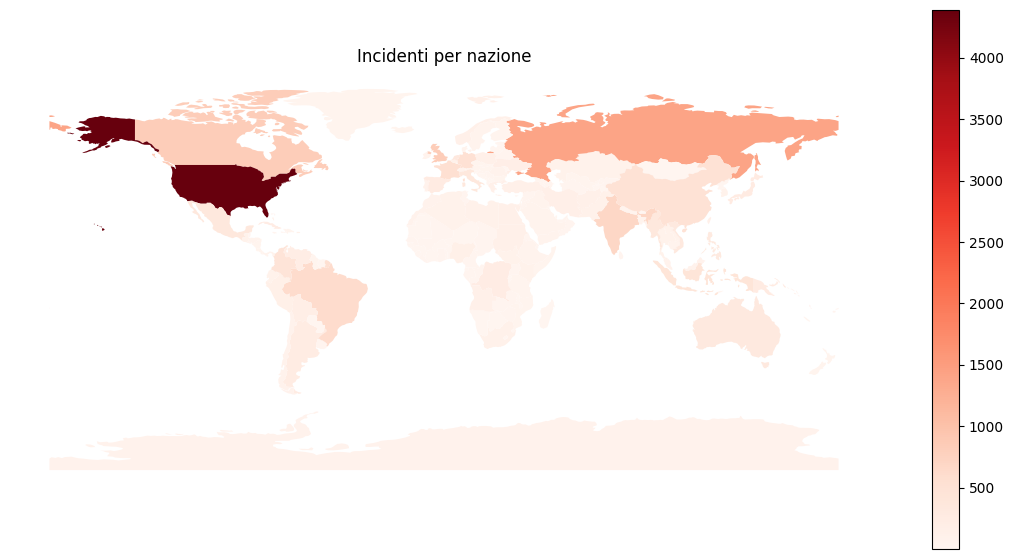

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
mappa_incidenti.plot(column='Incidenti', cmap='Reds', legend=True, ax=ax)
plt.title('Incidenti per nazione')
plt.axis('off')
plt.show()